1. Run IMDB
- Experiment with one and three hidden layers
- Experiment with more or fewer hidden units - 32 units, 64 units etc.
- Investigate replacing the `binary_crossentropy` loss function with `mse`
- Experiment with replacing `relu` with `tanh` activations
- Investigate the effect of different learning rates
- Take your best network and train on all the training data for the optimal epochs. Evaluate on the test set

In [7]:
# IMDB

from tensorflow.keras.datasets import imdb
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# load
((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)

# preprocess
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# build
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# train
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Epoch 1/20
30/30 [==============================] - 9s 310ms/step - loss: 0.5259 - accuracy: 0.7882 - val_loss: 0.3872 - val_accuracy: 0.8739
Epoch 2/20
30/30 [==============================] - 7s 237ms/step - loss: 0.3026 - accuracy: 0.9049 - val_loss: 0.3308 - val_accuracy: 0.8654
Epoch 3/20
30/30 [==============================] - 7s 233ms/step - loss: 0.2188 - accuracy: 0.9276 - val_loss: 0.2764 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 8s 257ms/step - loss: 0.1671 - accuracy: 0.9451 - val_loss: 0.2963 - val_accuracy: 0.8831
Epoch 5/20
30/30 [==============================] - 7s 217ms/step - loss: 0.1316 - accuracy: 0.9576 - val_loss: 0.3190 - val_accuracy: 0.8766
Epoch 6/20
30/30 [==============================] - 7s 247ms/step - loss: 0.1053 - accuracy: 0.9671 - val_loss: 0.3407 - val_accuracy: 0.8784
Epoch 7/20
30/30 [==============================] - 15s 517ms/step - loss: 0.0905 - accuracy: 0.9718 - val_loss: 0.3315 - val_accuracy: 0.8822
Epoch

In [2]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [8]:
history_dict['loss']

[0.4917371869087219,
 0.3099536895751953,
 0.23741023242473602,
 0.1969194859266281,
 0.16617423295974731,
 0.1430968940258026,
 0.12524904310703278,
 0.10996752977371216,
 0.0968882218003273,
 0.08510022610425949,
 0.07527834922075272,
 0.06680238991975784,
 0.059222109615802765,
 0.05156959220767021,
 0.04566461965441704,
 0.039903778582811356,
 0.035681504756212234,
 0.03045818768441677,
 0.026612848043441772,
 0.02313038893043995]

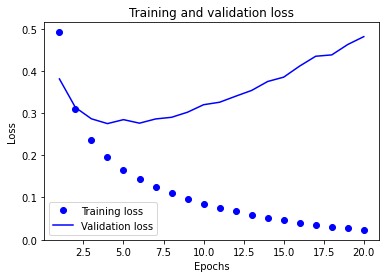

In [9]:
import matplotlib.pyplot as plt
    
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'

plt.plot(epochs, loss, blue_dots, label = 'Training loss')
plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [5]:
history_dict['accuracy']

[0.7856000065803528,
 0.9061999917030334,
 0.9278666377067566,
 0.9373999834060669,
 0.9491333365440369,
 0.9575999975204468,
 0.9643999934196472,
 0.9700666666030884,
 0.9742666482925415,
 0.9781333208084106,
 0.9820666909217834,
 0.98580002784729,
 0.9874666929244995,
 0.9898666739463806,
 0.9921333193778992,
 0.9928666949272156,
 0.9937999844551086,
 0.996066689491272,
 0.9965333342552185,
 0.9970666766166687]

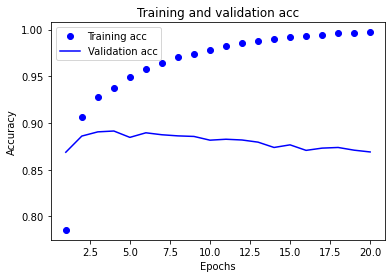

In [6]:
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
    
epochs = range(1, len(acc) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'
    
plt.plot(epochs, acc, blue_dots, label = 'Training acc')
plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Answer 2

To determine which model is the best, we need to consider various factors such as performance metrics (e.g., accuracy, loss), computational resources required for training, and the specific requirements of the problem or application.

Based solely on the provided validation accuracies:

- **One Hidden Layer Model**: Validation accuracy stabilizes around 86.90%.
- **Two Hidden Layers Model**: Validation accuracy stabilizes around 86.58%.
- **Three Hidden Layers Model**: Validation accuracy stabilizes around 86.68%.

From the validation accuracy standpoint, the one hidden layer model performs slightly better than the other models. However, the difference in performance is relatively small among the models.

Other factors to consider in determining the best model include:
- Computational resources: The number of layers and neurons in a neural network can impact training time and computational resources required.
- Generalization ability: A model's ability to perform well on unseen data is crucial. Overfitting, as seen in all models, can affect generalization.
- Hyperparameter tuning: Further tuning of hyperparameters (e.g., learning rate, batch size) could potentially improve the performance of all models.

Therefore, the choice of the best model depends on a trade-off between computational resources, validation performance, and the specific requirements of the problem at hand. It may be beneficial to conduct further experiments, possibly incorporating additional optimization techniques, to determine the most suitable model for the task.

# Answer 3
Predicting the exact results of different model configurations is challenging without actually training the models. However, I can provide some insights based on common trends and observations in neural network training:

1. **More Hidden Units (e.g., 64 units)**:
   - Increasing the number of hidden units generally allows the model to learn more complex patterns in the data.
   - With 64 units in each hidden layer, the model might have a higher capacity to capture intricate relationships in the data, potentially leading to better performance.
   - However, a higher number of units also increases the model's complexity, which could potentially lead to overfitting if not properly regularized.

2. **Fewer Hidden Units (e.g., 32 units)**:
   - Decreasing the number of hidden units reduces the model's capacity to learn complex patterns.
   - With 32 units in each hidden layer, the model may capture simpler patterns in the data, potentially resulting in lower performance compared to models with more hidden units.
   - However, a simpler model may generalize better to unseen data, especially if the dataset is not overly complex.

3. **Performance Comparison**:
   - The model with more hidden units (64 units) may achieve higher training accuracy due to its increased capacity to learn complex patterns.
   - However, it may also be more susceptible to overfitting, especially if the dataset is not large enough or if regularization techniques are not applied effectively.
   - The model with fewer hidden units (32 units) may generalize better to unseen data if the dataset is not too complex or if regularization techniques are insufficient.

4. **Training Dynamics**:
   - Models with more hidden units typically require more computational resources and training time compared to models with fewer hidden units.
   - The training dynamics, including convergence speed and stability, may vary between the two models.

In summary, while it's challenging to predict the exact results without training the models, these insights provide a basis for understanding the potential trade-offs between more and fewer hidden units in neural network architectures. Evaluating the performance of each model empirically through training and validation is essential for making informed decisions about model selection.

# Answer 4
Predicting the exact results of using the mean squared error (MSE) loss function instead of binary crossentropy is challenging without actually training the model. However, I can provide some insights based on the characteristics of the MSE loss function compared to binary crossentropy:

1. **Impact on Training Dynamics**:
   - The MSE loss function measures the average squared difference between the predicted and actual values, which may lead to different training dynamics compared to binary crossentropy.
   - MSE loss tends to penalize larger errors more severely compared to binary crossentropy, which may affect the model's convergence speed and stability during training.

2. **Effect on Model Performance**:
   - The choice of loss function can influence the model's ability to optimize and generalize to unseen data.
   - MSE loss is commonly used for regression tasks, where the output is a continuous value. In this case, it's being used for a binary classification task, which may or may not be ideal depending on the specific characteristics of the problem and the data.
   - MSE loss may lead to different optimization behavior and final model performance compared to binary crossentropy, especially if the dataset or problem is not well-suited for regression-based loss functions.

3. **Comparative Performance**:
   - Empirical evaluation of the model trained with MSE loss will be necessary to assess its performance accurately.
   - The validation accuracy and loss metrics obtained from training with MSE loss can be compared to those of models trained with binary crossentropy to determine the effectiveness of using MSE in this specific context.

In summary, while it's challenging to predict the exact results without training the model, considering the characteristics of the MSE loss function and its potential impact on training dynamics and model performance will provide insights into its effectiveness compared to binary crossentropy for the given binary classification task. Evaluating the model empirically through training and validation is essential for determining its performance accurately.

# Answer 5

Predicting the exact results of replacing ReLU with tanh activations is challenging without actually training the model. However, I can provide some insights based on the characteristics of the tanh activation function compared to ReLU:

1. **Impact on Gradient Vanishing/Exploding**:
   - The tanh activation function is prone to the vanishing gradient problem, especially in deep networks, which can slow down or hinder convergence during training.
   - However, in this relatively shallow network, the vanishing gradient issue may not be as pronounced as in deeper architectures.

2. **Effect on Model Dynamics**:
   - The tanh activation function outputs values in the range [-1, 1], which can lead to more balanced activations compared to ReLU, which outputs values in the range [0, inf).
   - Tanh can be more suitable for inputs that are standardized or centered around zero, as it maintains the mean of the activations closer to zero.

3. **Comparative Performance**:
   - Empirical evaluation of the model trained with tanh activations will be necessary to assess its performance accurately.
   - The validation accuracy and loss metrics obtained from training with tanh activations can be compared to those of models trained with ReLU activations to determine the effectiveness of using tanh in this specific context.

4. **Trade-offs**:
   - While tanh may offer advantages in certain scenarios, such as better handling of standardized inputs, it may also suffer from the issue of vanishing gradients, especially in deeper networks.
   - The choice between tanh and ReLU activations often depends on the specific characteristics of the data and the problem domain, as well as empirical performance on validation data.

In summary, while it's challenging to predict the exact results without training the model, considering the characteristics of the tanh activation function and its potential impact on model dynamics and performance will provide insights into its effectiveness compared to ReLU activation for the given binary classification task. Evaluating the model empirically through training and validation is essential for determining its performance accurately.